# Item 1D

In [1]:
results_dir = '../../../results/bpp-egc'

exp1 with 20 different seeds median is 92.975 IQR is 1.4124999999999943, normal=False
exp1 Alternatic hypothesis that median, 92.975, < 93 with 0.042470026656993363
Seed         0     1      2     3     4      5     6      7      8      9   \
openBins  93.05  93.0  91.65  93.1  93.0  93.05  92.1  92.95  93.05  91.45   

Seed        10    11     12    13    14     15     16     17    18    19  
openBins  93.0  91.6  91.55  93.1  93.0  92.85  93.05  92.95  91.5  90.6  


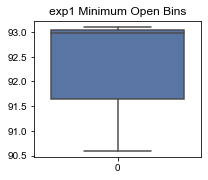

In [4]:
from egc_utils import table_min_open_bins_seed, figure_min_open_bins_seed
        
table_min_open_bins_seed(results_dir, 'exp1', 93)
figure_min_open_bins_seed(results_dir, 'exp1', 93)
# table_min_open_bins_seed(results_dir, 'exp2', 93)
# table_min_open_bins_seed(results_dir, 'exp3', 93)

In [ ]:
from egc_utils import figure_egc_box, min_open_bins_per_generation, figure_min_open_bins_generation
 
figure_egc_box(results_dir, 'exp1', 19)
figure_min_open_bins_generation(results_dir, 'exp1', 19)
# print(min_open_bins_per_generation(results_dir, 'exp1', 19))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

from egc_utils import min_open_bins_by_seed, min_open_bins_per_exp, figure_open_bins_by_exps

max_seed = 19

exp1_mins = min_open_bins_by_seed(results_dir, 'exp1', max_seed)
exp2_mins = min_open_bins_by_seed(results_dir, 'exp2', max_seed)
exp3_mins = min_open_bins_by_seed(results_dir, 'exp3', max_seed)

exp1_exp2_pvalue = wilcoxon(exp1_mins, exp2_mins, alternative="less").pvalue
exp1_exp3_pvalue = wilcoxon(exp1_mins, exp3_mins).pvalue
exp2_exp3_pvalue = wilcoxon(exp2_mins, exp3_mins).pvalue

print(f"exp1 median {exp1_mins.median()}")
print(f"exp2 median {exp2_mins.median()}")
print(f"exp3 median {exp3_mins.median()}")
print(f"exp1_exp2_pvalue {exp1_exp2_pvalue}")
print(f"exp1_exp3_pvalue {exp1_exp3_pvalue}")
print(f"exp2_exp3_pvalue {exp2_exp3_pvalue}")
min_open_bins_per_exp(results_dir, 'exp1', max_seed)
min_open_bins_per_exp(results_dir, 'exp2', max_seed)
min_open_bins_per_exp(results_dir, 'exp3', max_seed)
    
def figure_open_bins_by_exps(results_dir, exp_names, max_seed, y='openBins', figure_name='OpenBins'):
    fig, axes = plt.subplots()
    fig.set_size_inches(12, 4)
    sns.set_theme(style="whitegrid")
    df = pd.DataFrame()
    for exp_name in exp_names:
        min_open_bins = min_open_bins_by_seed(results_dir, exp_name, max_seed, y)
        df[exp_name] = min_open_bins
    box_plot = sns.boxplot(data=df, orient="h")
    box_plot.set(xlabel='Open Bins')
    plt.savefig(f'{results_dir}/{figure_name}.eps', format='eps') 
    
figure_open_bins_by_exps(results_dir, ['exp1','exp2','exp3'], max_seed)
print("Done")